# Study In-Layer Durations

## Notebook Summary
- Loads processed experiment and full-study datasets for in-layer duration analysis.
- Computes descriptive statistics and boxplots for center-finding and number-showing durations.
- Compares show-event counts against layer-change counts and exports difference tables.
- Includes an exploratory timestamp check for potential show/hide timing inconsistencies.


## Imports and Helper Functions
Load common imports, path constants, and helper utilities from `functions.ipynb`.


In [1]:
# Imports and utilities from functions.ipynb

%run functions.ipynb


### Load In-Layer Duration Datasets
Read experiment and full-study tables needed for in-layer duration analyses and quick data validation.


In [70]:
# Load experiment-only and full tracking datasets.
data_complete = pd.read_csv(rf'{export_data}data_experiment.csv', sep=";")
data_complete_full = pd.read_csv(rf'{export_data}data_all.csv', sep=";")

# Load precomputed in-layer duration tables for experiment and all trials.
df_NumberDisplayed = pd.read_csv(rf'{export_data}numberDisplayed_experiment.csv', sep=";")
df_NumberDisplayed_full = pd.read_csv(rf'{export_data}numberDisplayed_all.csv', sep=";")

# Quick sanity check of the loaded analysis table.
display(df_NumberDisplayed)


,Unnamed: 0,ShowIndex,ShowDate,HideIndex,HideDate,Condition,TrialNumber,Layer,ResultLayer,BlockId,ProbandId,LastLayerChangeDate,LastLayerChangeIndex,Duration_ShowNumber,Duration_FindCenter
0,104,30937,2022-08-01 14:14:06.859,30945.0,2022-08-01 14:14:07.093,No Feedback,0,1,5,0,2,2022-08-01 14:14:06.019,30909,0.234,0.840
1,105,30970,2022-08-01 14:14:07.856,30972.0,2022-08-01 14:14:07.902,No Feedback,0,1,5,0,2,2022-08-01 14:14:06.019,30909,0.046,1.837
2,106,31053,2022-08-01 14:14:10.348,31055.0,2022-08-01 14:14:10.410,No Feedback,0,2,5,0,2,2022-08-01 14:14:09.411,31022,0.062,0.937
3,107,31167,2022-08-01 14:14:13.778,31173.0,2022-08-01 14:14:13.951,No Feedback,0,2,5,0,2,2022-08-01 14:14:12.988,31141,0.173,0.790
4,108,31256,2022-08-01 14:14:16.443,31327.0,2022-08-01 14:14:18.563,No Feedback,0,3,5,0,2,2022-08-01 14:14:15.477,31224,2.120,0.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16473,18566,3370972,2022-08-23 11:29:45.766,3370999.0,2022-08-23 11:29:46.561,No Feedback,83,4,7,3,23,2022-08-23 11:29:44.302,3370924,0.795,1.464
16474,18567,3371074,2022-08-23 11:29:48.804,3371093.0,2022-08-23 11:29:49.380,No Feedback,83,5,7,3,23,2022-08-23 11:29:47.338,3371025,0.576,1.466
16475,18568,3371151,2022-08-23 11:29:51.125,3371152.0,2022-08-23 11:29:51.155,No Feedback,83,6,7,3,23,2022-08-23 11:29:50.252,3371122,0.030,0.873
16476,18569,3371202,2022-08-23 11:29:52.646,3371249.0,2022-08-23 11:29:54.062,No Feedback,83,6,7,3,23,2022-08-23 11:29:50.252,3371122,1.416,2.394


### Descriptive Stats and Plots for Center-Finding Durations
Generate descriptive statistics and condition/layer boxplots for `Duration_FindCenter`.


count    16478.000000
mean         1.562359
std          0.891034
min          0.527000
25%          1.018000
50%          1.351000
75%          1.780750
max         18.568000
Name: Duration_FindCenter, dtype: float64

count    16478.000000
mean         0.894331
std          0.639355
min          0.009000
25%          0.436000
50%          0.886000
75%          1.137000
max          8.429000
Name: Duration_ShowNumber, dtype: float64

Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,4078.000000,4184.000000,4034.000000,4182.000000
mean,1.590875,1.585697,1.547441,1.525592
std,0.921261,0.927247,0.797522,0.908086
min,0.548000,0.527000,0.572000,0.565000
25%,1.022250,0.989000,1.070000,1.001000
50%,1.329500,1.349000,1.372000,1.342500
75%,1.819750,1.834500,1.750750,1.731000
max,9.676000,9.855000,10.766000,18.568000


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,4078.000000,4184.000000,4034.000000,4182.000000
mean,1.590875,1.585697,1.547441,1.525592
std,0.921261,0.927247,0.797522,0.908086
min,0.548000,0.527000,0.572000,0.565000
25%,1.022250,0.989000,1.070000,1.001000
50%,1.329500,1.349000,1.372000,1.342500
75%,1.819750,1.834500,1.750750,1.731000
max,9.676000,9.855000,10.766000,18.568000


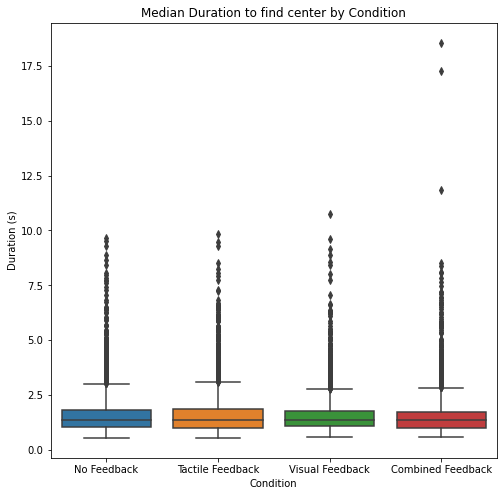

ResultLayer,1,2,3,4,5,6,7
count,2238.000000,2284.000000,2397.000000,2478.000000,2410.000000,2427.000000,2244.000000
mean,1.494558,1.555424,1.520456,1.524632,1.582805,1.635240,1.622673
std,0.765807,0.886759,0.817310,0.823482,0.869594,1.069967,0.957220
min,0.590000,0.572000,0.565000,0.527000,0.572000,0.548000,0.570000
25%,0.987250,1.027750,1.007000,1.012000,1.030250,1.028500,1.029750
50%,1.323000,1.356000,1.325000,1.324500,1.368000,1.384000,1.381500
75%,1.733000,1.748000,1.751000,1.739500,1.805000,1.828500,1.849250
max,9.468000,10.766000,9.855000,9.272000,8.649000,18.568000,9.676000


ResultLayer,1,2,3,4,5,6,7
count,2238.000000,2284.000000,2397.000000,2478.000000,2410.000000,2427.000000,2244.000000
mean,1.494558,1.555424,1.520456,1.524632,1.582805,1.635240,1.622673
std,0.765807,0.886759,0.817310,0.823482,0.869594,1.069967,0.957220
min,0.590000,0.572000,0.565000,0.527000,0.572000,0.548000,0.570000
25%,0.987250,1.027750,1.007000,1.012000,1.030250,1.028500,1.029750
50%,1.323000,1.356000,1.325000,1.324500,1.368000,1.384000,1.381500
75%,1.733000,1.748000,1.751000,1.739500,1.805000,1.828500,1.849250
max,9.468000,10.766000,9.855000,9.272000,8.649000,18.568000,9.676000


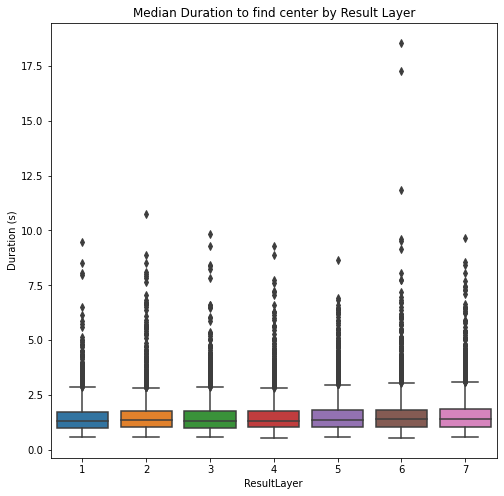

Layer,1,2,3,4,5,6,7
count,2540.000000,2484.000000,2376.000000,2316.000000,2309.000000,2288.000000,2165.000000
mean,1.559317,1.503216,1.459929,1.474552,1.549380,1.529993,1.888175
std,0.912584,0.794911,0.654336,0.717463,0.720967,0.718588,1.446048
min,0.565000,0.527000,0.572000,0.581000,0.575000,0.570000,0.608000
25%,0.948500,0.965750,1.004000,1.029000,1.070000,1.071000,1.119000
50%,1.290000,1.317500,1.324000,1.323000,1.388000,1.371500,1.439000
75%,1.882250,1.779250,1.717000,1.682250,1.797000,1.735000,1.939000
max,10.766000,8.863000,6.512000,9.468000,7.923000,9.516000,18.568000


Layer,1,2,3,4,5,6,7
count,2540.000000,2484.000000,2376.000000,2316.000000,2309.000000,2288.000000,2165.000000
mean,1.559317,1.503216,1.459929,1.474552,1.549380,1.529993,1.888175
std,0.912584,0.794911,0.654336,0.717463,0.720967,0.718588,1.446048
min,0.565000,0.527000,0.572000,0.581000,0.575000,0.570000,0.608000
25%,0.948500,0.965750,1.004000,1.029000,1.070000,1.071000,1.119000
50%,1.290000,1.317500,1.324000,1.323000,1.388000,1.371500,1.439000
75%,1.882250,1.779250,1.717000,1.682250,1.797000,1.735000,1.939000
max,10.766000,8.863000,6.512000,9.468000,7.923000,9.516000,18.568000


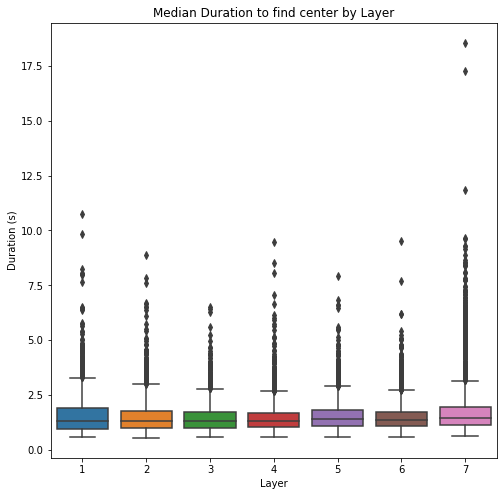

In [3]:
# Compute descriptive statistics for key in-layer duration metrics.
desc1 = df_NumberDisplayed['Duration_FindCenter'].describe()

desc2 = df_NumberDisplayed['Duration_ShowNumber'].describe()

display(desc1)
display(desc2)

# Compare center-finding duration distributions across condition and layer groupings.
generateBoxPlotStats(df_NumberDisplayed, ['Condition'], ['ShowIndex'], 'Duration_FindCenter', 'Condition', 'Duration (s)', 'Median Duration to find center by Condition', 'duration_findCenter_Condition', True, True, True, True)
generateBoxPlotStats(df_NumberDisplayed, ['ResultLayer'], ['ShowIndex'], 'Duration_FindCenter', 'ResultLayer', 'Duration (s)', 'Median Duration to find center by Result Layer', 'duration_findCenter_ResultLayer', True, True, False, True)
generateBoxPlotStats(df_NumberDisplayed, ['Layer'], ['ShowIndex'], 'Duration_FindCenter', 'Layer', 'Duration (s)', 'Median Duration to find center by Layer', 'duration_findCenter_Layer', True, True, False, True)


### Plot Number-Showing Durations
Visualize `Duration_ShowNumber` across condition, result layer, and current layer.


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,4078.000000,4184.000000,4034.000000,4182.000000
mean,0.730604,0.818342,1.027811,1.001253
std,0.570980,0.639318,0.672017,0.622857
min,0.011000,0.009000,0.014000,0.016000
25%,0.297000,0.318750,0.718000,0.702000
50%,0.622000,0.809500,0.968000,0.937000
75%,1.030750,1.110000,1.200000,1.197750
max,7.604000,6.558000,8.429000,6.167000


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,4078.000000,4184.000000,4034.000000,4182.000000
mean,0.730604,0.818342,1.027811,1.001253
std,0.570980,0.639318,0.672017,0.622857
min,0.011000,0.009000,0.014000,0.016000
25%,0.297000,0.318750,0.718000,0.702000
50%,0.622000,0.809500,0.968000,0.937000
75%,1.030750,1.110000,1.200000,1.197750
max,7.604000,6.558000,8.429000,6.167000


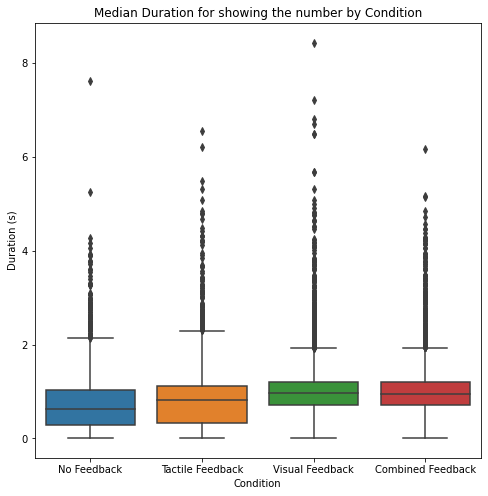

ResultLayer,1,2,3,4,5,6,7
count,2238.000000,2284.000000,2397.000000,2478.000000,2410.000000,2427.000000,2244.000000
mean,0.818195,0.870561,0.888645,0.907795,0.916431,0.920057,0.934101
std,0.473478,0.571965,0.643631,0.679552,0.696441,0.669366,0.691994
min,0.014000,0.015000,0.009000,0.019000,0.015000,0.029000,0.013000
25%,0.456000,0.457750,0.441000,0.390000,0.398500,0.451000,0.452000
50%,0.867000,0.873000,0.888000,0.904000,0.881500,0.889000,0.895500
75%,1.063750,1.110250,1.142000,1.159750,1.163000,1.151000,1.166000
max,3.944000,4.673000,7.209000,6.558000,7.604000,6.167000,8.429000


ResultLayer,1,2,3,4,5,6,7
count,2238.000000,2284.000000,2397.000000,2478.000000,2410.000000,2427.000000,2244.000000
mean,0.818195,0.870561,0.888645,0.907795,0.916431,0.920057,0.934101
std,0.473478,0.571965,0.643631,0.679552,0.696441,0.669366,0.691994
min,0.014000,0.015000,0.009000,0.019000,0.015000,0.029000,0.013000
25%,0.456000,0.457750,0.441000,0.390000,0.398500,0.451000,0.452000
50%,0.867000,0.873000,0.888000,0.904000,0.881500,0.889000,0.895500
75%,1.063750,1.110250,1.142000,1.159750,1.163000,1.151000,1.166000
max,3.944000,4.673000,7.209000,6.558000,7.604000,6.167000,8.429000


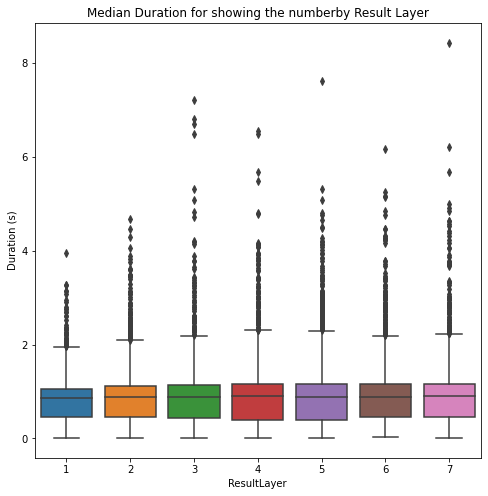

Layer,1,2,3,4,5,6,7
count,2540.000000,2484.000000,2376.000000,2316.000000,2309.000000,2288.000000,2165.000000
mean,0.788656,0.821015,0.945897,0.967380,0.893482,0.878902,0.984901
std,0.582911,0.568377,0.657000,0.683742,0.681532,0.596902,0.678945
min,0.009000,0.018000,0.017000,0.011000,0.015000,0.015000,0.013000
25%,0.325000,0.351500,0.484000,0.525000,0.424000,0.450000,0.514000
50%,0.813000,0.842500,0.931000,0.919000,0.861000,0.871000,0.968000
75%,1.071000,1.088000,1.195000,1.156000,1.106000,1.120250,1.250000
max,5.666000,4.239000,6.812000,6.558000,7.604000,4.839000,8.429000


Layer,1,2,3,4,5,6,7
count,2540.000000,2484.000000,2376.000000,2316.000000,2309.000000,2288.000000,2165.000000
mean,0.788656,0.821015,0.945897,0.967380,0.893482,0.878902,0.984901
std,0.582911,0.568377,0.657000,0.683742,0.681532,0.596902,0.678945
min,0.009000,0.018000,0.017000,0.011000,0.015000,0.015000,0.013000
25%,0.325000,0.351500,0.484000,0.525000,0.424000,0.450000,0.514000
50%,0.813000,0.842500,0.931000,0.919000,0.861000,0.871000,0.968000
75%,1.071000,1.088000,1.195000,1.156000,1.106000,1.120250,1.250000
max,5.666000,4.239000,6.812000,6.558000,7.604000,4.839000,8.429000


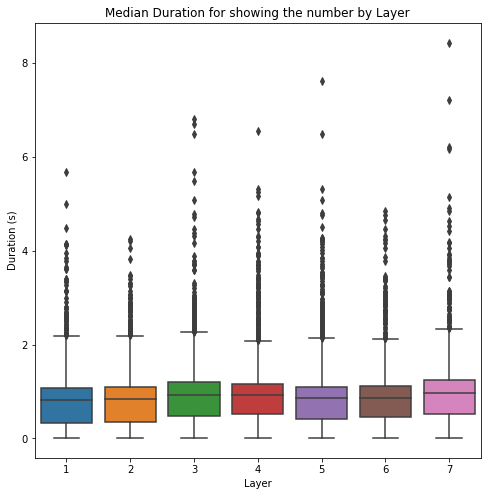

In [4]:
# Compare number-showing duration distributions for the same grouping dimensions.
generateBoxPlotStats(df_NumberDisplayed, ['Condition'], ['ShowIndex'], 'Duration_ShowNumber', 'Condition', 'Duration (s)', 'Median Duration for showing the number by Condition', 'duration_findCenter_Condition', True, True, True, True)
generateBoxPlotStats(df_NumberDisplayed, ['ResultLayer'], ['ShowIndex'], 'Duration_ShowNumber', 'ResultLayer', 'Duration (s)', 'Median Duration for showing the numberby Result Layer', 'duration_findCenter_ResultLayer', True, True, False, True)
generateBoxPlotStats(df_NumberDisplayed, ['Layer'], ['ShowIndex'], 'Duration_ShowNumber', 'Layer', 'Duration (s)', 'Median Duration for showing the number by Layer', 'duration_findCenter_Layer', True, True, False, True)


### Count Show Events Per Trial
Aggregate the number of show events per participant/trial and compare distributions by condition.


,ProbandId,TrialNumber,Condition,LastLayerChangeIndex
0,2,0,No Feedback,21
1,2,1,No Feedback,8
2,2,2,No Feedback,12
3,2,3,No Feedback,13
4,2,4,No Feedback,18
...,...,...,...,...
1843,23,79,No Feedback,7
1844,23,80,No Feedback,9
1845,23,81,No Feedback,13
1846,23,82,No Feedback,6


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,462.000000,462.000000,462.000000,462.000000
mean,8.826840,9.056277,8.731602,9.051948
std,2.615716,2.635704,2.363276,2.775299
min,2.000000,3.000000,6.000000,4.000000
25%,7.000000,7.000000,7.000000,7.000000
50%,8.000000,8.000000,8.000000,8.000000
75%,10.000000,10.000000,10.000000,10.000000
max,23.000000,22.000000,19.000000,34.000000


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,84.000000,84.000000,84.000000,84.000000
mean,8.824348,8.909226,8.754790,9.167871
std,1.177185,1.291532,1.093925,1.601638
min,6.857143,5.500000,7.000000,6.750000
25%,8.000000,8.125000,7.851190,8.250000
50%,8.700000,8.812500,8.500000,9.000000
75%,9.628571,9.500000,9.500000,9.500000
max,11.833333,13.500000,11.400000,19.250000


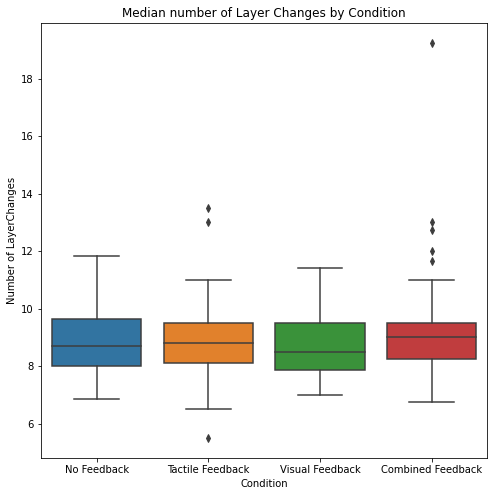

In [71]:
# Count how often a number was shown per participant/trial/condition.
showNumbers = df_NumberDisplayed.groupby(['ProbandId', 'TrialNumber','Condition'])['LastLayerChangeIndex'].count().reset_index()
showNumbers_all = df_NumberDisplayed_full.groupby(['ProbandId', 'TrialNumber','Condition'])['LastLayerChangeIndex'].count().reset_index()

display(showNumbers)

# Visualize the distribution of show-event counts by condition.
generateBoxPlotStats(showNumbers, ['Condition'], ['TrialNumber'], 'LastLayerChangeIndex', 'Condition', 'Number of LayerChanges', 'Median number of Layer Changes by Condition', 'numLayerChanges_Condition', True, True, True, True)


### Compare Show Counts With Layer Changes
Merge show-event counts with layer-change counts, compute differences, and export analysis tables.


,ProbandId,TrialNumber,Condition,ShowNumberCount,BlockId,LayerChangeCount,Difference
16,2,0,No Feedback,21,0.0,60.0,39.0
17,2,1,No Feedback,8,0.0,19.0,11.0
18,2,2,No Feedback,12,0.0,43.0,31.0
19,2,3,No Feedback,13,0.0,40.0,27.0
20,2,4,No Feedback,18,0.0,32.0,14.0
...,...,...,...,...,...,...,...
2195,23,79,No Feedback,7,3.0,21.0,14.0
2196,23,80,No Feedback,9,3.0,18.0,9.0
2197,23,81,No Feedback,13,3.0,26.0,13.0
2198,23,82,No Feedback,6,3.0,27.0,21.0


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,462.000000,462.000000,462.000000,462.000000
mean,12.709957,12.677489,7.008658,7.097403
std,9.191519,8.726123,3.696738,3.847589
min,1.000000,1.000000,-1.000000,-2.000000
25%,7.000000,7.000000,5.000000,5.000000
50%,10.000000,10.000000,6.000000,6.000000
75%,16.000000,16.000000,9.000000,9.000000
max,77.000000,63.000000,23.000000,24.000000


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,84.000000,84.000000,84.000000,84.000000
mean,12.546287,12.014881,6.975737,7.029478
std,4.103846,3.474054,1.437894,1.627995
min,5.571429,4.500000,4.000000,4.250000
25%,9.500000,9.437500,6.191667,5.875000
50%,12.000000,11.750000,6.833333,6.750000
75%,14.785714,14.312500,7.607143,7.781250
max,25.857143,21.250000,10.333333,12.000000


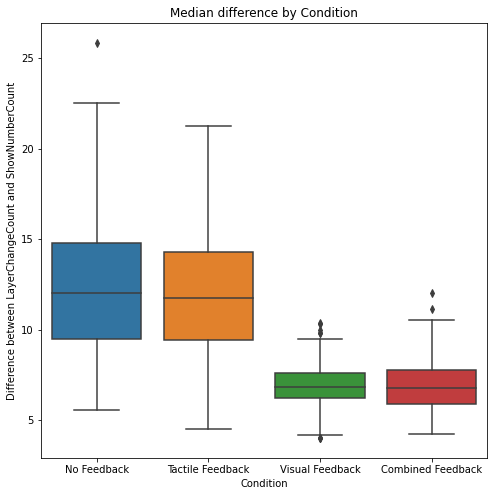

In [73]:
# Load the separately computed layer-change counts per trial.
layerChanges = pd.read_csv(rf'{export_data}layerChanges_pID_tNr.csv', sep=";")

numLayerChanges = layerChanges[['ProbandId', 'BlockId', 'TrialNumber', 'LayerChange']]

# Merge trial-wise show-event counts with layer-change counts.
merged = pd.merge(showNumbers_all, numLayerChanges, on=['ProbandId', 'TrialNumber'], how='left')

# Rename merged columns to explicit metric names for downstream analysis.
merged = merged.rename(columns={merged.columns[3]: 'ShowNumberCount', merged.columns[5]: 'LayerChangeCount'})

# Positive values indicate more layer changes than show events in a trial.
merged['Difference'] = merged['LayerChangeCount'] - merged['ShowNumberCount']

# Keep only non-training blocks for experiment-level statistics.
merged_experiment = merged[merged['BlockId'] >= 0]

display(merged_experiment)

# Plot condition-wise differences and export full + experiment-only tables.
generateBoxPlotStats(merged_experiment, ['Condition'], ['TrialNumber'], 'Difference', 'Condition', 'Difference between LayerChangeCount and ShowNumberCount', 'Median difference by Condition', 'diffLayerChangeShowNumber_Condition', True, True, True, True)

merged.to_csv(rf'{export_data}layerChangeDifferences_pID_tNr.csv', sep=";")
merged_experiment.to_csv(rf'{export_data}layerChangeDifferences_experiment_pID_tNr.csv', sep=";")


### Exploratory Timestamp Consistency Check
Inspect whether sub-state changes fall within show/hide intervals to identify timing anomalies.


In [6]:
desc_tmp = df_NumberDisplayed.describe()
display(desc_tmp['Duration_ShowNumber'])

# Collect non-zero sub-state changes from raw experiment timestamps.
subStateChange = pd.to_datetime(data_complete[data_complete['SubStateChange'] != 0]['Date'])

# Ensure show/hide columns are parsed as datetimes for interval checks.
df_NumberDisplayed['ShowDate'] = pd.to_datetime(df_NumberDisplayed['ShowDate'])
df_NumberDisplayed['HideDate'] = pd.to_datetime(df_NumberDisplayed['HideDate'])

# Find number-display intervals that contain a sub-state change timestamp.
changeBeforeRelease = []
for d in subStateChange:
    item = df_NumberDisplayed[(df_NumberDisplayed['ShowDate'] < d) & (df_NumberDisplayed['HideDate'] > d)]
    if len(item) > 0:
        display(item)
        # df_NumberDisplayed.loc[item.index[0], 'HideDate'] = d

display(subStateChange)

# Re-check summary stats after timestamp conversions and inspection.
display(df_NumberDisplayed.describe()['Duration_ShowNumber'])


count    16478.000000
mean         0.894331
std          0.639355
min          0.009000
25%          0.436000
50%          0.886000
75%          1.137000
max          8.429000
Name: Duration_ShowNumber, dtype: float64

0         2022-08-01 14:12:39.590
2699      2022-08-01 14:14:00.583
5317      2022-08-01 14:15:19.144
5439      2022-08-01 14:15:22.806
6794      2022-08-01 14:16:03.476
                    ...          
2887893   2022-08-23 11:28:46.149
2888081   2022-08-23 11:28:51.802
2889347   2022-08-23 11:29:29.777
2889452   2022-08-23 11:29:32.930
2890415   2022-08-23 11:30:01.828
Name: Date, Length: 3784, dtype: datetime64[ns]

count    16478.000000
mean         0.894331
std          0.639355
min          0.009000
25%          0.436000
50%          0.886000
75%          1.137000
max          8.429000
Name: Duration_ShowNumber, dtype: float64